In [1]:
# %pip install matplotlib

In [9]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from ImportUtils import get_dfAll_from_Parquet
from ImportUtils import get_dfResultados_from_Parquet, get_dfResultAnalise_from_Parquet
from ImportUtils import vprint, vprint_time

from ChartUtils import chart
#from ChartUtils import linechart, barchart, barchart_nseries
#from main import dicParams, dicFiles


K_MATPLOTLIB_STYLES_FILE = "NOVAENES.mplstyle"


# Get Data

In [10]:
dfAll = get_dfAll_from_Parquet()
dfAllFase1 = dfAll[dfAll["Fase"]=="1"]
xList = list(dfAll.groupby('DescrExameAbrev').size().reset_index(name='count').sort_values('count', ascending=False).head(10)['DescrExameAbrev'])


# Charts, part 1

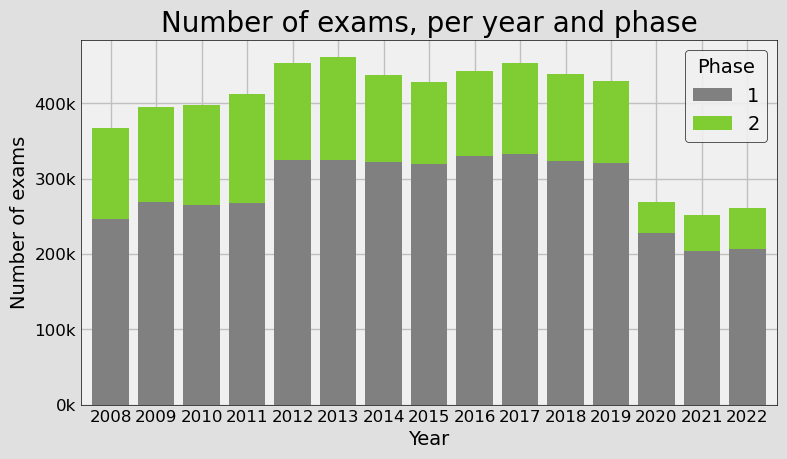

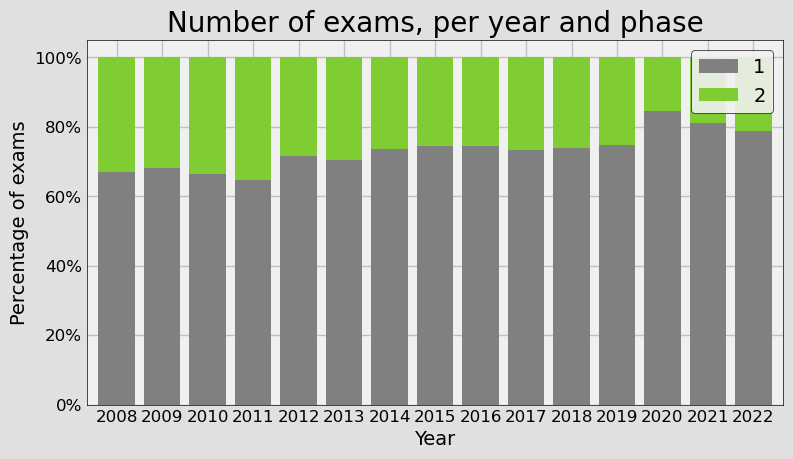

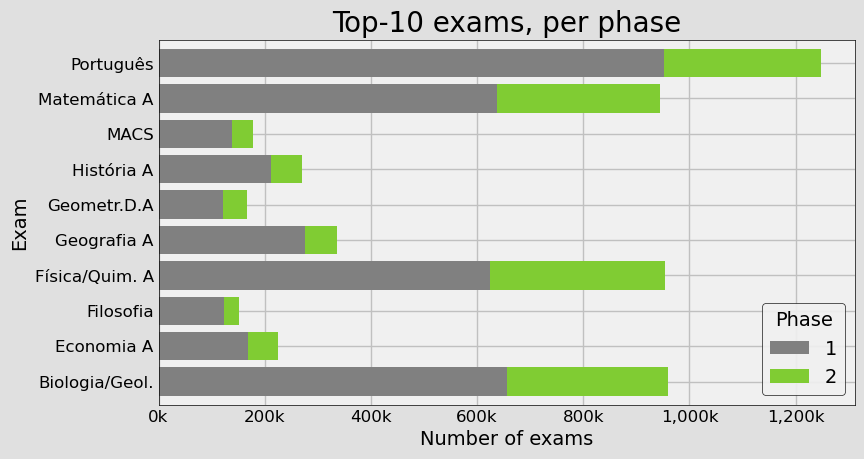

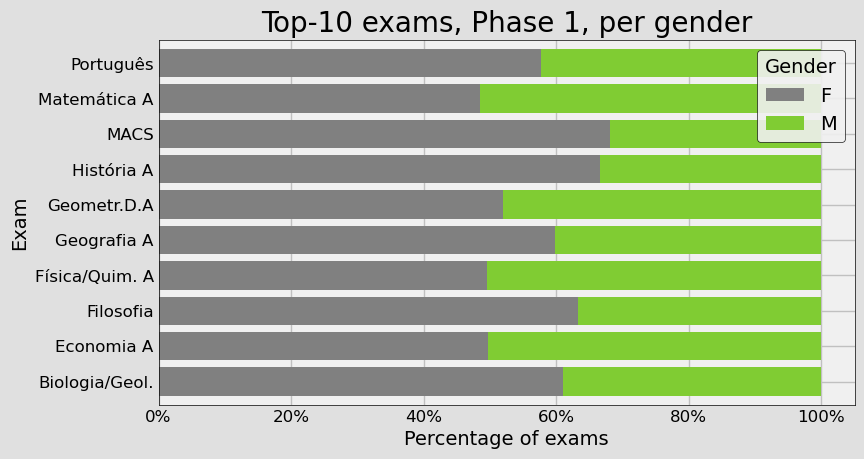

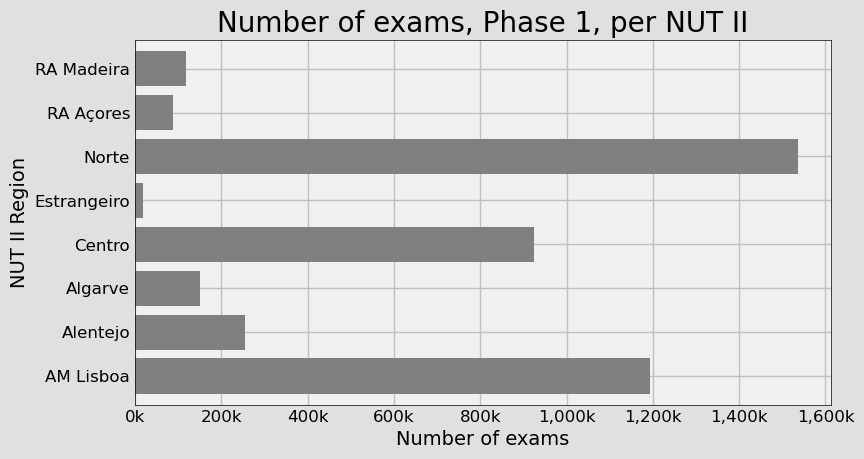

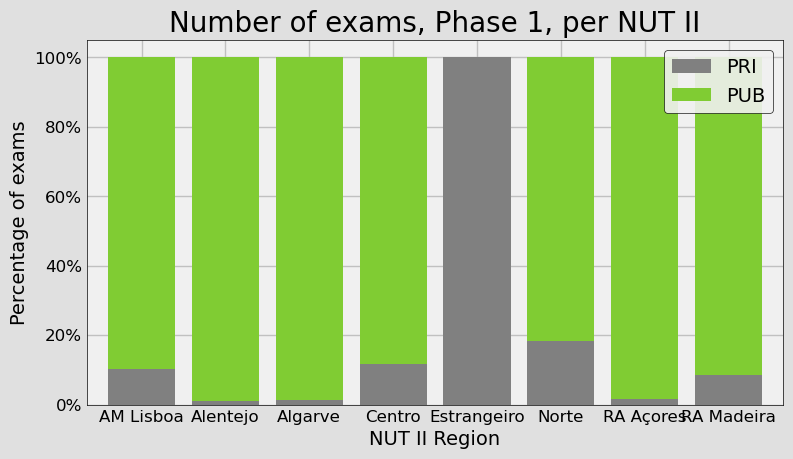

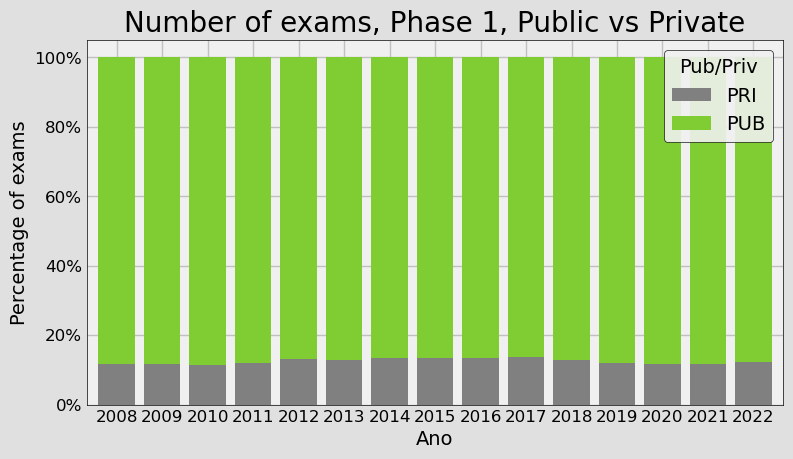

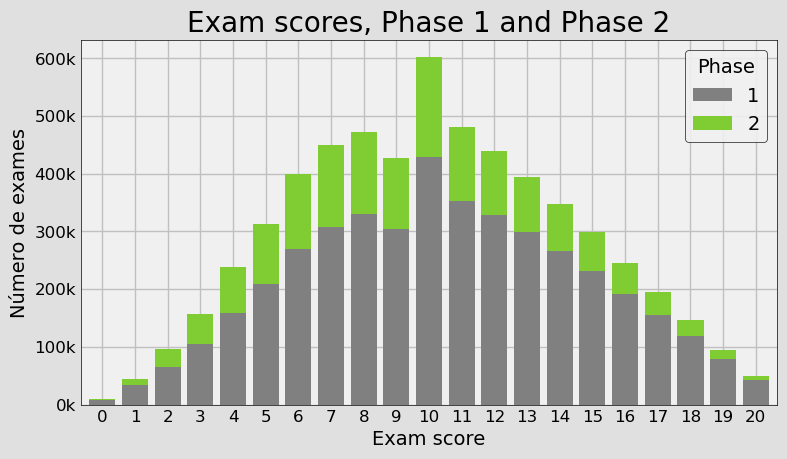

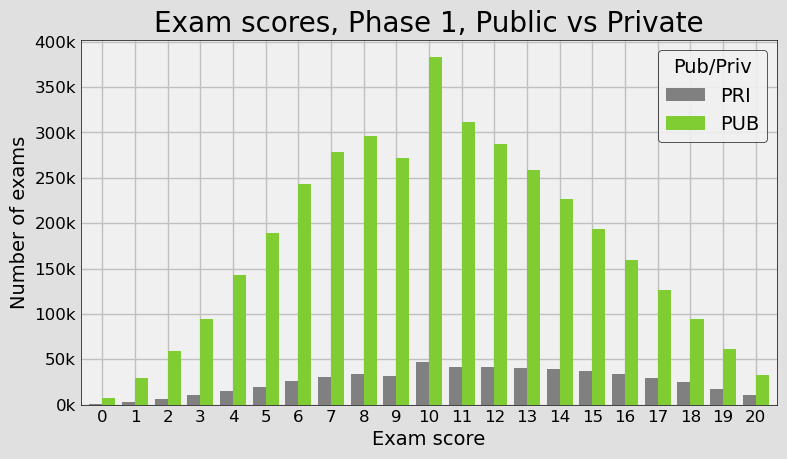

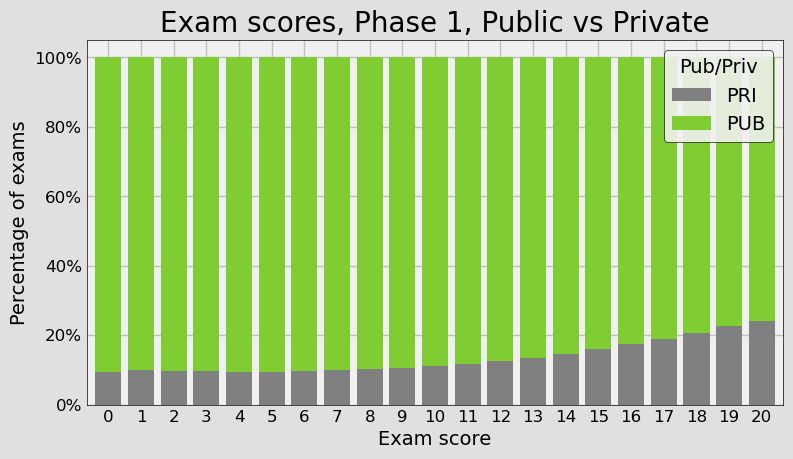

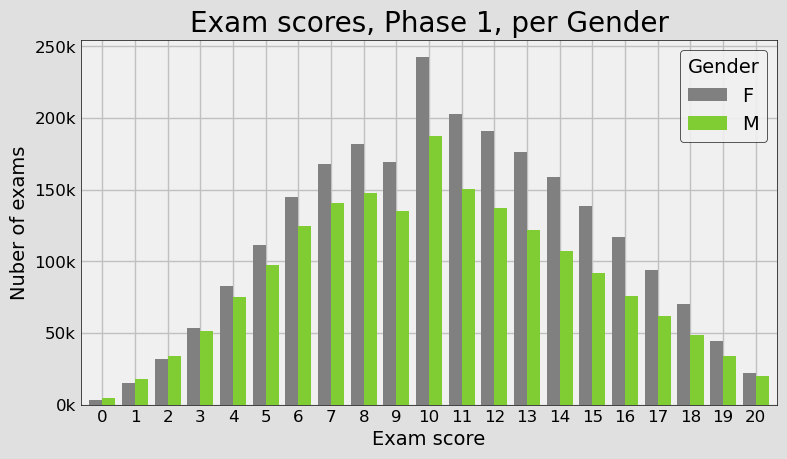

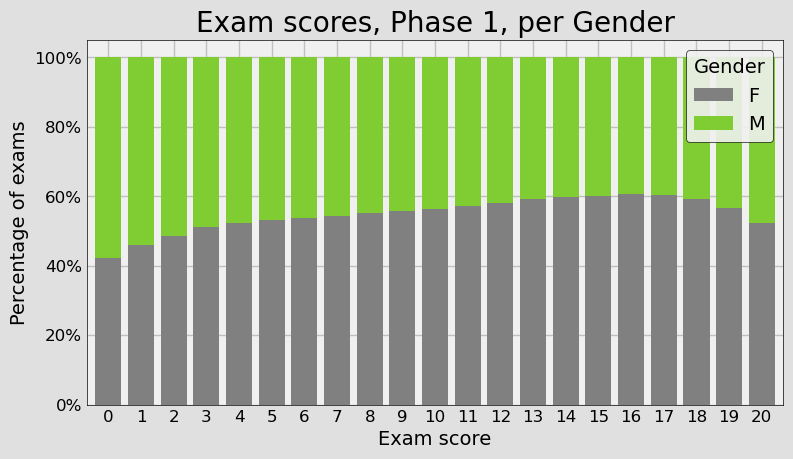

In [11]:
# Final plots

#1 Total exames, por ano e fase
title = "Number of exams, per year and phase"
chart(kind="bar", df=dfAll, xvar='ano', xlabel="Year", yvar=None, ylabel='Number of exams', zvar = "Fase", zlabel="Phase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart( kind='bar', df=dfAll, xvar='ano', xlabel="Year", xlimit=(2008,2022), yvar=None, zvar="Fase", ylabel='Percentage of exams',  stacked=True, normalize=True, title=title, yAxisScale=100, yAxisScaleSymbol='%')



#2 Top provas, fase 1+2
title = "Top-10 exams, per phase"
dfSubset = dfAll[dfAll['DescrExameAbrev'].isin(xList)]
chart(kind="barh", df=dfSubset, xvar='DescrExameAbrev', xlabel='Number of exams', yvar=None, ylabel='Exam', zvar = "Fase", zlabel="Phase", title=title, stacked=True, xAxisScale=1/1000, xAxisScaleSymbol='k')

#3 Top provas, fase 1, por sexo
title = "Top-10 exams, Phase 1, per gender"
dfSubset = dfAllFase1[dfAllFase1['DescrExameAbrev'].isin(xList)]
chart(kind="barh", df=dfSubset, xvar='DescrExameAbrev', xlabel="Percentage of exams", yvar=None, ylabel='Exam', zvar = "Sexo", zlabel="Gender", title=title, stacked=True, normalize=True, xAxisScale=100, xAxisScaleSymbol='%')

#4 Provas 1a fase, por região
title = "Number of exams, Phase 1, per NUT II"
chart(kind="barh", df=dfAllFase1, xvar='DescrNuts2', xlabel='Number of exams', yvar=None, ylabel='NUT II Region', zvar = "Fase", zlabel="Phase", title=title, xAxisScale=1/1000, xAxisScaleSymbol='k', legend=None)
chart( kind='bar', df=dfAll, xvar='DescrNuts2', xlabel="NUT II Region", yvar=None, zvar="PubPriv", ylabel='Percentage of exams', stacked=True, normalize=True, title=title, yAxisScale=100, yAxisScaleSymbol='%')

#5 Provas 1a fase, por região
title = "Number of exams, Phase 1, Public vs Private"
chart(kind="bar", df=dfAllFase1, xvar='ano', xlabel="Ano", yvar=None, ylabel='Percentage of exams', zvar = "PubPriv", zlabel="Pub/Priv", title=title, stacked=True, normalize=True, yAxisScale=100, yAxisScaleSymbol='%')

#6 Resultados, 1a e 2a fase
title = "Exam scores, Phase 1 and Phase 2"
chart(kind="bar", df=dfAll, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Número de exames', zvar = "Fase", zlabel="Phase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')

#7 Resultados 1a fase, pub/priv
title = "Exam scores, Phase 1, Public vs Private"
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Number of exams', zvar = "PubPriv", zlabel="Pub/Priv", title=title, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Percentage of exams', zvar = "PubPriv", zlabel="Pub/Priv", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)

#8 Resultados 1a fase, por sexo
title = "Exam scores, Phase 1, per Gender"
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Nuber of exams', zvar = "Sexo", zlabel="Gender", title=title, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Percentage of exams', zvar = "Sexo", zlabel="Gender", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)



# Parte 2 - COVID

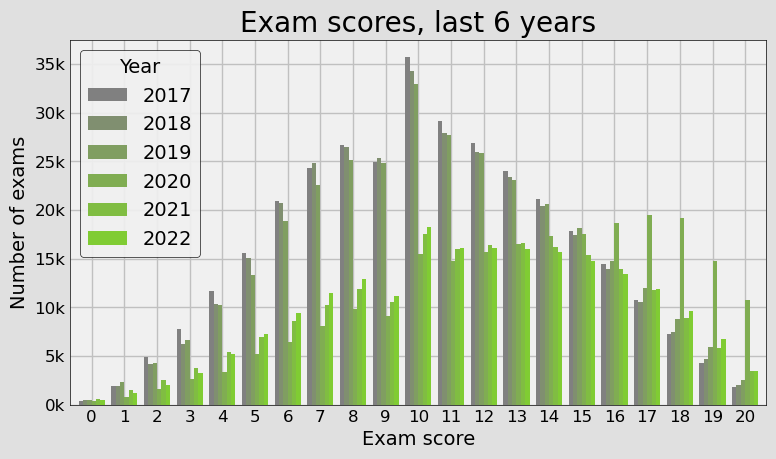

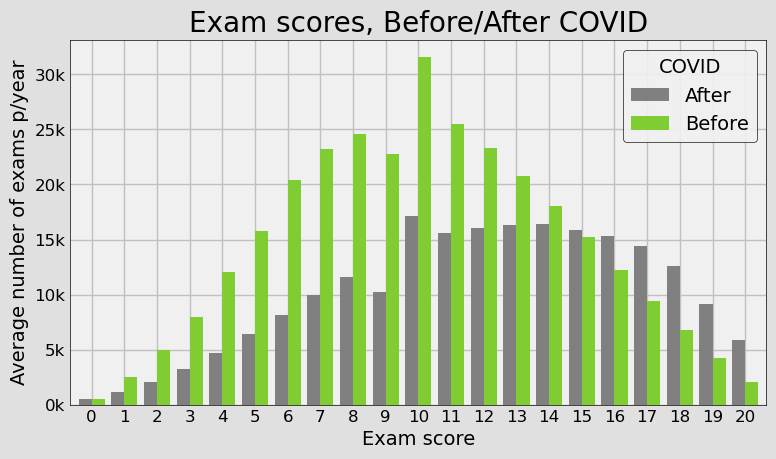

In [16]:
# Resultados dos últimos 6 anos
title = "Exam scores, last 6 years"
dfsubset = dfAllFase1[dfAllFase1["ano"]>=2017]
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar=None, ylabel='Number of exams', zvar = "ano", zlabel="Year", title=title, stacked=False, normalize=False, yAxisScale=1/1000, yAxisScaleSymbol='k')

# for title in range(2018, 2023):
# 	dfsubset = dfAllFase1[ dfAllFase1['ano'] == title]
# 	chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', yvar=None, zlabel="", title=title)


# Resultados dos anos antes e depois da COVID
title = "Exam scores, Before/After COVID"
dfCountYears = dfAllFase1[["Covid", "ano"]].groupby('Covid').nunique("ano")
dfsubset = dfAllFase1.groupby(['Class_Exam_Rounded','Covid']).size().reset_index(name='count')
dfsubset = dfsubset.merge(dfCountYears, on='Covid', how='left')
dfsubset['count_per_year'] = dfsubset['count'] / dfsubset['ano']
chart(kind="bar", df=dfsubset, xvar='Class_Exam_Rounded', xlabel="Exam score", yvar="count_per_year", ylabel='Average number of exams p/year', zvar = "Covid", zlabel="COVID", title=title, stacked=False, normalize=False, yAxisScale=1/1000, yAxisScaleSymbol='k')


# PARTE 2

# Line Charts

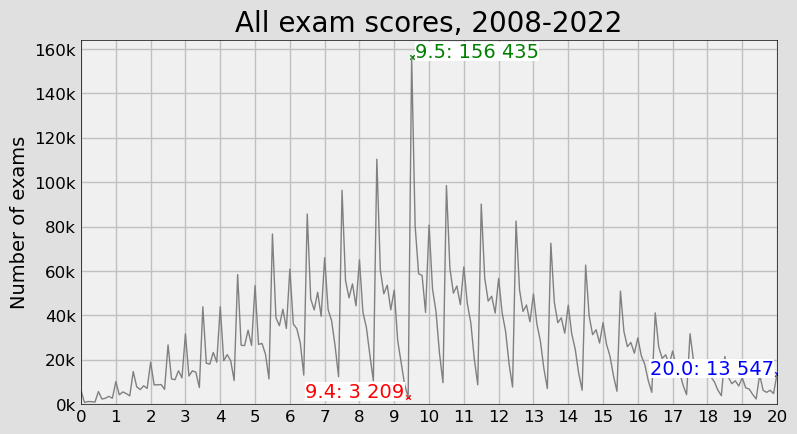

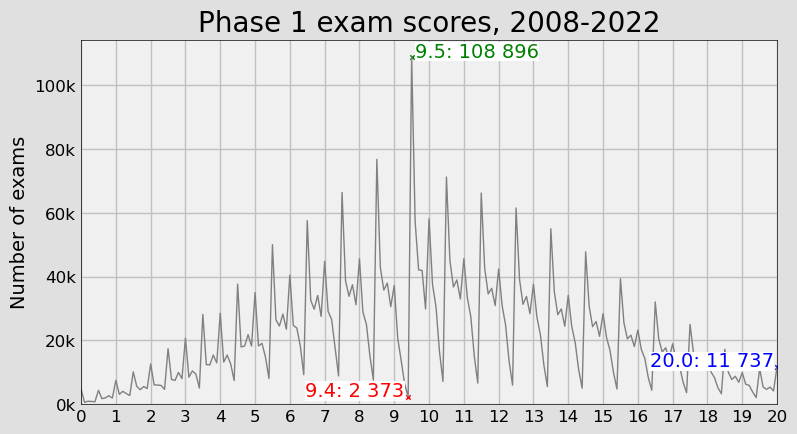

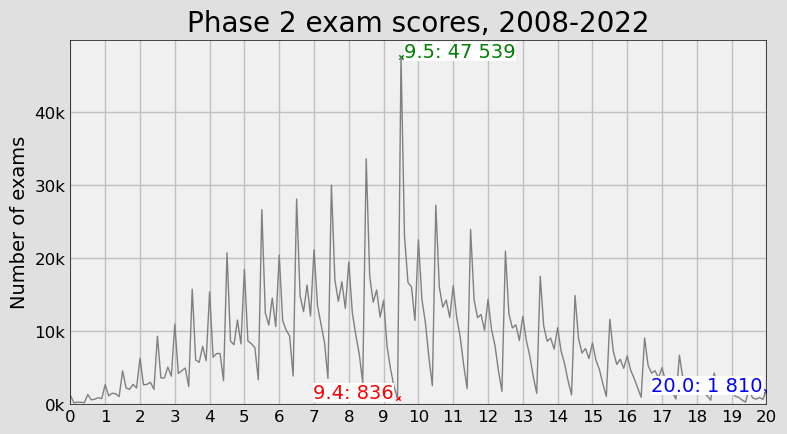

In [19]:
title = "All exam scores, 2008-2022"
chart(kind="line", df=dfAll, \
	xvar="Class_Exam", yvar=None, zvar=None, zlabel=None, legend=None, \
	dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) , \
	yAxisScale=1/1000, yAxisScaleSymbol='k', title=title, xticks=np.arange(0, 20.1, 1), xlimit=(0,20))



dfsubset = dfAll[dfAll['Fase'] == '1']
title = "Phase 1 exam scores, 2008-2022"
chart("line", dfAllFase1, \
	   xvar="Class_Exam", yvar=None, zvar=None, zlabel=None, legend=None, \
	  dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)), \
	  yAxisScale=1/1000, yAxisScaleSymbol='k', title=title, xticks=np.arange(0, 20.1, 1), xlimit=(0,20))


dfsubset = dfAll[(dfAll['Fase'] == '2')]
title = "Phase 2 exam scores, 2008-2022"
chart("line", dfsubset, \
	   xvar="Class_Exam", yvar=None, zvar=None, zlabel=None, legend=None, \
	  dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)), \
	  yAxisScale=1/1000, yAxisScaleSymbol='k', title=title, xticks=np.arange(0, 20.1, 1), xlimit=(0,20))


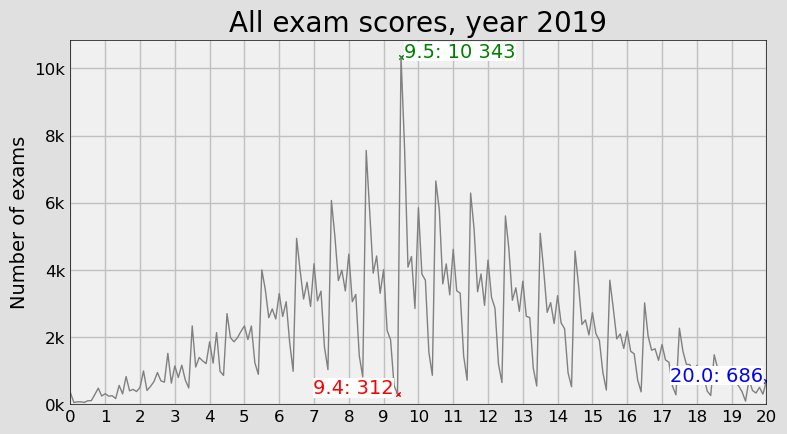

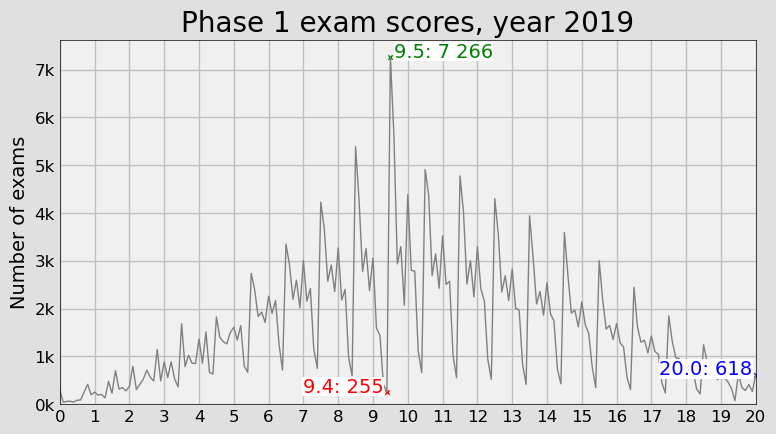

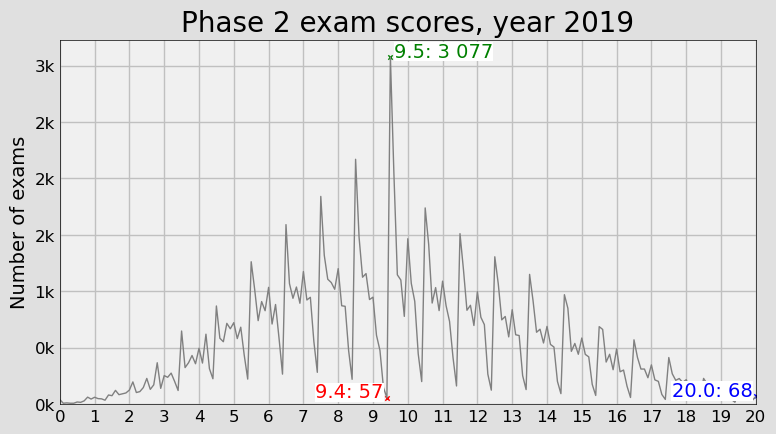

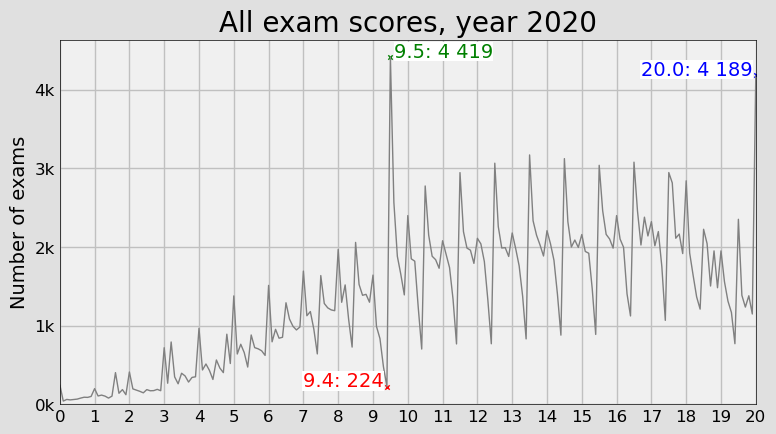

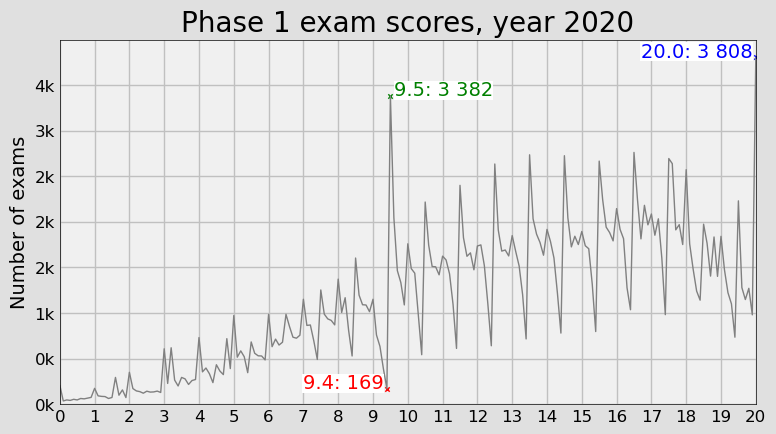

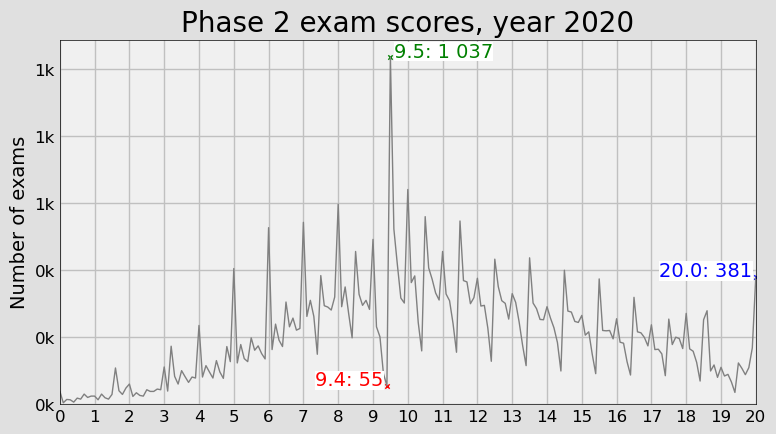

In [20]:
for ano in [2019, 2020]:
	title = "All exam scores, year " + str(ano)
	dfsubset = dfAll[(dfAll['ano'] == ano)]
	chart(kind="line", df=dfsubset, \
		xvar="Class_Exam", yvar=None, zvar=None, zlabel=None, legend=None, \
		dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) , \
		yAxisScale=1/1000, yAxisScaleSymbol='k', title=title, xticks=np.arange(0, 20.1, 1), xlimit=(0,20))

	title = "Phase 1 exam scores, year " + str(ano)
	dfsubset = dfAllFase1[(dfAllFase1['ano'] == ano)]
	chart(kind="line", df=dfsubset, \
		xvar="Class_Exam", yvar=None, zvar=None, zlabel=None, legend=None, \
		dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) , \
		yAxisScale=1/1000, yAxisScaleSymbol='k', title=title, xticks=np.arange(0, 20.1, 1), xlimit=(0,20))

	title = "Phase 2 exam scores, year " + str(ano)
	dfsubset = dfAll[(dfAll['ano'] == ano) & (dfAll['Fase'] == '2')]
	chart(kind="line", df=dfsubset, \
		xvar="Class_Exam", yvar=None, zvar=None, zlabel=None, legend=None, \
		dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) , \
		yAxisScale=1/1000, yAxisScaleSymbol='k', title=title, xticks=np.arange(0, 20.1, 1), xlimit=(0,20))



# Exames por Sexo, Pub/Priv e Fase

# FUNDOS


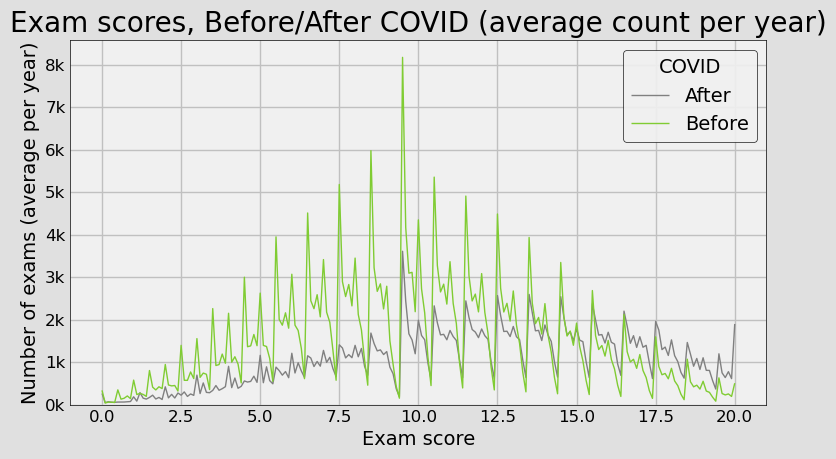

In [12]:
# Resultados dos últimos 6 anos
title = "Exam scores, last 6 years"

# Resultados dos anos antes e depois da COVID
title = "Exam scores, Before/After COVID (average count per year)"
dfCountYears = dfAllFase1[["Covid", "ano"]].groupby('Covid').nunique("ano")
dfsubset = dfAllFase1.groupby(['Class_Exam','Covid']).size().reset_index(name='count')
dfsubset = dfsubset.merge(dfCountYears, on='Covid', how='left')
dfsubset['count_per_year'] = dfsubset['count'] / dfsubset['ano']
chart(kind="line", df=dfsubset, xvar='Class_Exam', xlabel="Exam score", yvar="count_per_year", ylabel='Number of exams (average per year)', zvar = "Covid", zlabel="COVID", title=title, stacked=False, normalize=False, yAxisScale=1/1000, yAxisScaleSymbol='k')


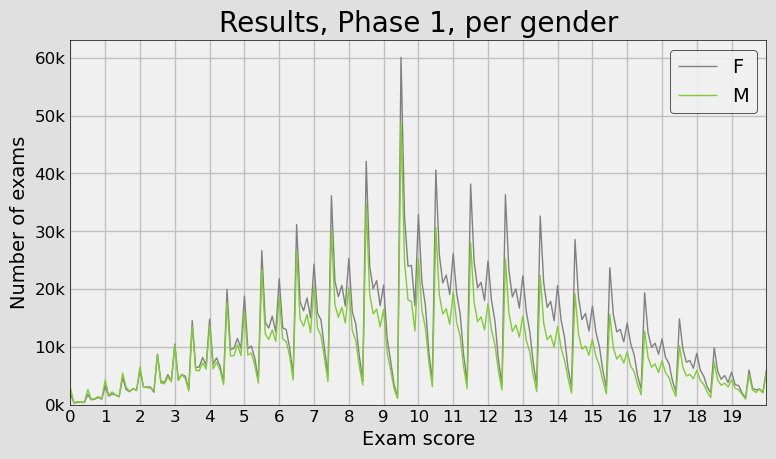

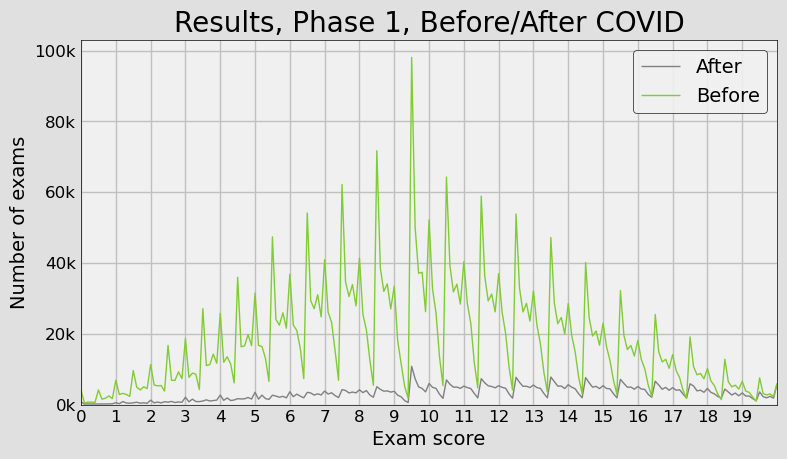

In [14]:
#8 Resultados 1a fase, por sexo
title = "Results, Phase 1, per gender"
chart(kind="line", df=dfAllFase1, xvar='Class_Exam', xlabel="Exam score", yvar=None, ylabel='Number of exams', title=title, yAxisScale=1/1000, yAxisScaleSymbol='k', xlimit=(0,20), zvar = "Sexo", xticks=np.arange(0, 20, 1), dots=[])
#chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "Sexo", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)


title = "Results, Phase 1, Before/After COVID"
chart(kind="line", df=dfAllFase1, xvar='Class_Exam', xlabel="Exam score", yvar=None, ylabel='Number of exams', title=title, yAxisScale=1/1000, yAxisScaleSymbol='k', xlimit=(0,20), zvar = "Covid", xticks=np.arange(0, 20, 1), dots=[])
#chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "Sexo", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)


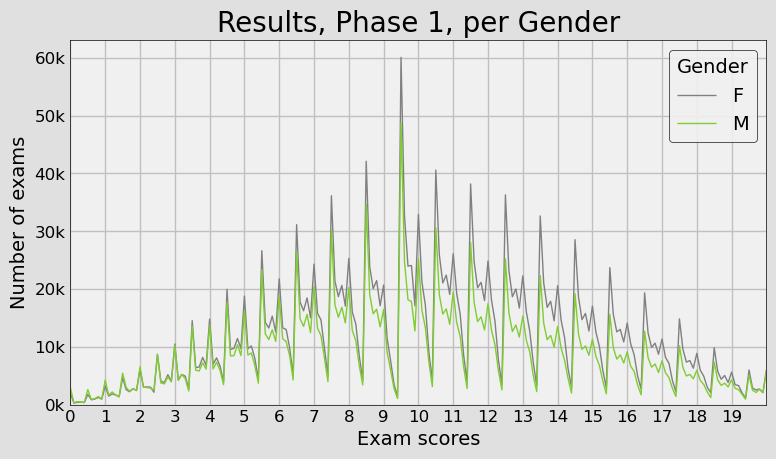

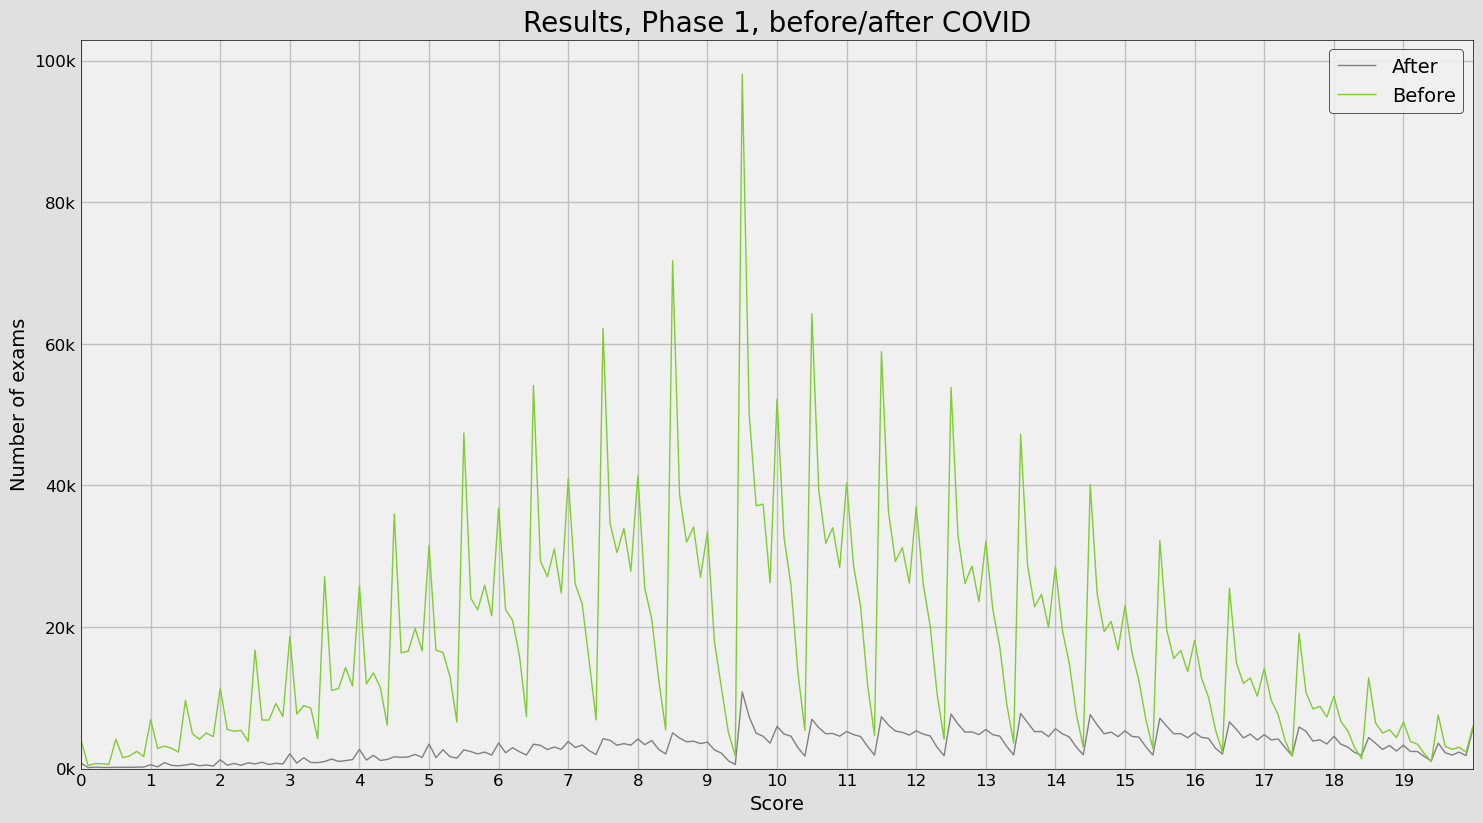

In [16]:

#8 Resultados 1a fase, por sexo
title = "Results, Phase 1, per Gender"
figsize=(8,4.5)
chart(kind="line", figsize=figsize, df=dfAllFase1, title=title, \
	xvar='Class_Exam', xlabel="Exam scores", yvar=None, ylabel='Number of exams',yAxisScale=1/1000, yAxisScaleSymbol='k', xlimit=(0,20), zvar = "Sexo", zlabel="Gender",\
	xticks=np.arange(0, 20, 1), dots=[])


title = "Results, Phase 1, before/after COVID"
figsize=(16,9)
chart(kind="line",  figsize=figsize, df=dfAllFase1, title=title, \
	xvar='Class_Exam', xlabel="Score", yvar=None, ylabel='Number of exams', yAxisScale=1/1000, yAxisScaleSymbol='k', xlimit=(0,20), zvar = "Covid", xticks=np.arange(0, 20, 1), dots=[])
#chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "Sexo", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)


In [14]:
for ano in range(2008, 2022+1):
	dfAnoFase1 = dfAllFase1[dfAllFase1["ano"]==ano][["Class_Exam"]]
	print("Year: {}, mean: {}, median: {}".format(ano, dfAnoFase1["Class_Exam"].mean(), dfAnoFase1["Class_Exam"].median()))


Year: 2008, mean: 10.57245943776403, median: 10.3
Year: 2009, mean: 10.432210199431049, median: 10.5
Year: 2010, mean: 10.09462916277681, median: 10.0
Year: 2011, mean: 9.832742624557623, median: 9.6
Year: 2012, mean: 9.232180515459476, median: 9.1
Year: 2013, mean: 8.784062865227288, median: 8.5
Year: 2014, mean: 9.784592841864754, median: 9.7
Year: 2015, mean: 10.00298352396301, median: 9.8
Year: 2016, mean: 10.116699093857012, median: 10.0
Year: 2017, mean: 10.148668800115496, median: 10.0
Year: 2018, mean: 10.230937638008298, median: 10.0
Year: 2019, mean: 10.439796884145506, median: 10.3
Year: 2020, mean: 13.085069661143587, median: 13.6
Year: 2021, mean: 11.513634981659832, median: 11.8
Year: 2022, mean: 11.51138003506019, median: 11.6
